# Personal Information
Name: **Coen Korevaar**

StudentID: **13441728**

Email: [**Coen.korevaar@student.uva.nl**](coen.korevaar@student.uva.nl)

Github: [**https://github.com/CoenKor/Dutch-legal-advice-RAG.git**](https://github.com/CoenKor/Dutch-legal-advice-RAG.git)

Submitted on: **22-03-2024**

# Data Context
The dataset of this project is from the website named ‘Rechtspraak.nl’. Rechtspraak.nl is the official website of the Dutch judiciary which offers a platform for public access to judicial information. It is a central portal for finding information about different court procedures, judicial decisions, and the organization of the courts in the Netherlands. The searchable database makes it an invaluable resource for legal professionals, researchers, and the general public interested in the outcomes of specific cases or the legal precedents set by the Dutch judiciary.

The dataset contains a collection of law cases from the Netherlands. The dataset covers cases from the full calendar year from January 1, 2021, to January 1, 2022. It is important to note that the scope of this dataset is restricted to criminal law, thereby excluding any cases that fall outside of this domain. The criminal law cases within the dataset are diverse, ranging from minor traffic infractions to grave crimes such as murder and manslaughter. Included within are also cases involving sexual offenses, assault, child abuse, fraud, and other crimes that disrupt public order. The dataset does not overlook judicial considerations such as pre-trial detention, the issuance of sentences, and appeals, as well as specialized branches like juvenile and magistrate criminal law. Also captured are instances of conditional release before and after the legislation change on July 1, 2021, the confiscation of unlawfully gained advantages, theft, and burglary, along with instances where complaints were not prosecuted due to the absence of a criminal offense. This data will be the foundation of the Retrieval Augmented Generation (RAG) model that will create legal advice, such as relevant arguments to use in a case, based on different case descriptions.


# Data Description
In the Data Description section of this thesis, a comprehensive analysis of the dataset is conducted which consists of textual data from criminal law cases. Utilizing the df.shape function in Python, gives that the dataset contains 25,653 entries, organized across 13 distinctive features.

The following are descriptions of the different features and their corresponding datatype:

**ECLI:**
Unique identifier for each court case

*Datatype:* object

**id:**
Unique identifier for each row

*Datatype:* Int64

**title:**
Indicates the chronological part (number) of the case description and the type of the row

*Datatype:* Int64

**type:**
Specifies the type of the row in the entire case description

*Datatype:* object

**data:**
Actual textual data representing various types in the court case description

*Datatype:* object

**articles:**
Dutch laws (articles) referenced in the court case

*Datatype:* object

**procedure:**
Different procedures involved in a court case

*Datatype:* object

**date:**
Date when the court case took place

*Datatype:* object

**straffen:**
The kind of punishment imposed during the court case

*Datatype:* object

**hoofdstraf:**
The primary and most significant punishment given during the court case

*Datatype:* object

**straf_hoogte:**
Numerical representation of the punishment, e.g., the number of years for a prison sentence or the amount of money for a fine

*Datatype:* float


This dataset contains information from 2,860 unique criminal law cases. The apparent discrepancy between the number of cases and the dataset entries is due to the varied types of documentation associated with each court case. These entries represent different facets of the legal proceedings, capturing the complexity and depth of judicial documentation.

Each entry is a part of a larger case file and can be categorized as follows:

1. **Process flow**: The chronological sequence of legal events and proceedings.
2. **Declaration of proven facts**: The formal statement acknowledging established legal facts in a case.
3. **Considerations**: Factors or thoughts taken into account before making a legal decision or judgment.
4. **Decision**: The final legal conclusion or resolution reached after considering all relevant information.
5. **Indictment**: The formal accusation or charge presented against a person in a legal case.
6. **Determination of criminal liability**: The legal process of establishing whether a person is criminally responsible.
7. **Legal provisions**: Rules and regulations set forth by law governing specific legal actions or behaviors.
8. **Introduction**: The opening section providing initial background information in a legal document or proceeding.
9. **Prosecution's demand or claim**: Specific requests made by the prosecuting party in a legal case, often regarding punishments.
10. **Seizure**: The legal act of taking possession of property or assets as part of a legal process.
11. **Sentencing**: The formal determination and imposition of legal punishment or penalty upon a convicted person.
12. **Preliminary questions**: Initial legal inquiries or issues addressed before the main proceedings in a case.
13. **Miscellaneous**: Other legal matters that do not fall into specific categories.
14. **Identification**: The legal process of confirming and establishing the identity of individuals involved in a case.
15. **Injured parties**: Individuals or entities recognized as victims in a legal proceeding, having suffered harm, damage, or loss.


### Analysis 1

The df.shape and df.head(40) give a lot of information about this dataset regarding missing values, data types and how the data values are structured in the dataset. The ‘articles’, ‘straffen’, ‘hoofdstraf’ and ‘straf_hoogte’ columns have a lot of missing values. This is expected, given that the ‘articles’ values are only present in the type ‘wettelijke voorstellen’ and the other three in the type ‘beslissing’. These columns become particularly relevant because this is the stage in the entire court case procedure where they are addressed. The other columns don’t have missing values. 

The summary statistics of numerical variables seems less relevant as both unique identifiers (id and section_id) and the severity of the punishment (whether in terms of prison sentence duration or fine amount) are not particularly useful. This is due to the variable nature of the punishment, ranging from a duration in prison years to a fine.  

The summary statistics of categorical variables gives a good overview of the categorical variables present in the dataset, especially the unique values of each variable. Because of this insight, we see six unique values for punishments. This information brings on a detailed examination of each possible punishment for further insights.  

The unique values of the ‘types’ column were also printed to understand the column and the possible values. This also applies to the column ‘procedure’ which doesn’t seem relevant at first sight but can be relevant in the future when the RAG model will be fine-tuned. This is because this column gives information about the specific procedure which can also impact the arguments used in a court case. All columns appear to hold relevance for the RAG model.

### Analysis 2

The identification of the thirty most common non-stop words without numerical values is considered irrelevant as these are standard terms used in court cases. Attempts to improve results by incorporating an array of standard words yielded limited success, given the diverse usage of such words in legal contexts. Similarly, extracting relevant topics from court cases proves challenging due to the rarity of these words in the dataset. However, this limitation does not hinder the RAG model, which will focus more on the rare words (topics) in the case descriptions.

### Analysis 3

The sentiment analysis revealed that the majority of the data returned neutral values, which is not surprising considering the frequent use of a neutral sentiment in legal cases. However, it is noteworthy that 63 cases showed a sentiment score above 0.5, indicating either a positive or negative sentiment. These are more outliers in our opinion. Lawyers, judges and the person who describes the cases have to keep a neutral sentiment during all court cases. 

### Analysis 4

An examination of word distribution in the process flow and introduction reveals a notable difference. The introduction exhibits a broader distribution than the process flow. So, for correlating the number of words in a case with the severity of imposed penalties, the introduction data is prioritized.


This correlation analysis examines the relationship between the number of words in the case introduction and the severity of punishments. Some types of punishments show a correlation with the length of the introduction and the severity of the punishments. Specifically, the amount of a fine exhibits a strong positive correlation with the number of words in the case introduction. Therefore, the longer the case, the higher the fine. Additionally, imprisonment has a moderate negative correlation, while community service shows a moderate positive correlation.

Efforts to identify the number of cases of each type in the dataset faced challenges due to the absence of a clear column containing this information. Attempting to extract this information from the text of every claim in a court case proved successful for only a hundred cases. Fortunately, the integration of a vector database with an LLM will eliminate the need for a structured description of the case types, ensuring a more efficient and accurate categorization process.



# Appendix: Code Used

### Data Loading

In [49]:
# Imports
import os
import numpy as np
import pandas as pd
from collections import Counter
import re
import nltk
from gensim import corpora, models
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [50]:
df = pd.read_csv('parsed_data.csv')

### Analysis 1: 
Make sure to add some explanation of what you are doing in your code. This will help you and whoever will read this a lot in following your steps.

In [51]:
df.shape

(25653, 13)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25653 entries, 0 to 25652
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ECLI          25653 non-null  object 
 1   id            25653 non-null  int64  
 2   section_id    25653 non-null  int64  
 3   title         25636 non-null  object 
 4   type          25653 non-null  object 
 5   data          25653 non-null  object 
 6   articles      25653 non-null  object 
 7   subject       25653 non-null  object 
 8   procedure     25653 non-null  object 
 9   date          25653 non-null  object 
 10  straffen      2945 non-null   object 
 11  hoofdstraf    2544 non-null   object 
 12  straf_hoogte  2945 non-null   float64
dtypes: float64(1), int64(2), object(10)
memory usage: 2.5+ MB


In [ ]:
df.head(40)

In [54]:
# Check for unique cases
unique_eclis = df['ECLI'].unique()
print("We work with " + str(len(unique_eclis)) + " criminal law cases")

We work with 2860 criminal law cases


In [55]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of Duplicates:", duplicates)

# Summary statistics for numerical variables
summary_numerical = df.describe()
print("\nSummary Statistics for Numerical Variables:")
print(summary_numerical)

# Summary statistics for categorical variables
summary_categorical = df.describe(include='object')
print("\nSummary Statistics for Categorical Variables:")
print(summary_categorical)



Number of Duplicates: 0

Summary Statistics for Numerical Variables:
                 id    section_id  straf_hoogte
count  25653.000000  25653.000000    2945.00000
mean   12972.875102      4.346041    1455.00747
std     7593.388990      3.236321   18422.41813
min        0.000000      0.000000       0.00000
25%     6419.000000      2.000000       1.00000
50%    12832.000000      4.000000      90.00000
75%    19483.000000      7.000000     500.00000
max    26369.000000     42.000000  900000.00000

Summary Statistics for Categorical Variables:
                          ECLI                 title          type  \
count                    25653                 25636         25653   
unique                    2860                  2145            15   
top     ECLI:NL:RBGEL:2021:993  2 De tenlastelegging  overwegingen   
freq                        43                   902          4568   

                                                     data articles  \
count                         

In [56]:
# Check for unique punishments
unique_values = df['hoofdstraf'].unique()
print(unique_values)

[nan 'vrijspraak' 'gevangenisstraf' 'geldboete' 'taakstraf' 'hechtenis'
 'TBS']


In [57]:
straffen = ['vrijspraak', 'gevangenisstraf', 'geldboete', 'taakstraf', 'hechtenis', 'TBS']

# Summary statistics for each punishment
for i in straffen:
    print(i)
    print(df[df['hoofdstraf'] == i].describe())
    print()


vrijspraak
                 id  section_id  straf_hoogte
count    395.000000  395.000000         395.0
mean   12780.865823    5.837975           1.0
std     7032.158772    3.205971           0.0
min        8.000000    1.000000           1.0
25%     7394.000000    4.000000           1.0
50%    12218.000000    5.000000           1.0
75%    17701.500000    8.000000           1.0
max    26369.000000   18.000000           1.0

gevangenisstraf
                 id   section_id  straf_hoogte
count   1431.000000  1431.000000   1431.000000
mean   13093.436758     8.914745    721.412998
std     7742.132023     1.554510    959.730894
min       17.000000     4.000000      1.000000
25%     6384.500000     8.000000    182.000000
50%    13521.000000     9.000000    425.000000
75%    19950.000000    10.000000    912.000000
max    26362.000000    25.000000  10950.000000

geldboete
                 id  section_id   straf_hoogte
count    128.000000  128.000000     128.000000
mean   13308.984375    8.75000

In [58]:
# Check for unique types
unique_types = df['type'].unique()
print(unique_types)

['procesverloop' 'bewezenverklaring' 'overwegingen' 'beslissing'
 'tenlastelegging' 'bepaling strafbaarheid' 'wettelijke voorschriften'
 'inleiding' 'eis' 'beslag' 'strafoplegging' 'voorvragen' 'overig'
 'identificatie' 'benadeelde partijen']


In [59]:
# Check for unique procedures
unique_procedures = df['procedure'].unique()
print(unique_procedures)

['Eerste aanleg - enkelvoudig' 'Eerste aanleg - meervoudig'
 'Op tegenspraak' 'Tussenuitspraak' 'Mondelinge uitspraak'
 'Proces-verbaal']


### Analysis 2: 

In [60]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# Drop rows with missing text data
text_data = df['data'].dropna()

# Concatenate all text data into a single string
all_text = ' '.join(text_data)

# Remove numeric characters
all_text = re.sub(r'\b\d+\b', '', all_text)

# Convert to lowercase and find words
words = re.findall(r'\b\w+\b', all_text.lower()) 

# Exclude stop words
stop_words = set(stopwords.words('dutch'))
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_freq = Counter(filtered_words)

# Print the most common words
print("Most common non-stop words after removing numeric characters:")
for word, freq in word_freq.most_common(30):
    print(word, ':', freq)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/coenkorevaar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common non-stop words after removing numeric characters:
verdachte : 211392
rechtbank : 87312
slachtoffer : 63226
naam : 57577
ten : 52938
feit : 44414
medeverdachte : 43856
benadeelde : 37301
bewezen : 30499
partij : 27178
feiten : 26233
justitie : 25308
officier : 23939
laste : 22642
ter : 21778
vordering : 19871
artikel : 19608
oordeel : 18723
verklaard : 17036
verdediging : 16650
schade : 16617
althans : 16272
bedrag : 16080
s : 15776
acht : 15314
gemaakt : 14858
gelegde : 14569
standpunt : 14165
uur : 13666
sprake : 13644


In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Define the list of standard words used in court cases that should not be included when searching for relevant topics
standard_words = ["advocaat", "vonnis", "arrest", "getuige", "proces-verbaal", "verweerder", "eiser", "griffier", "akte", "pleidooi",
                    "cassatie", "arrestatie", "bewijsstuk", "aanklacht", "verhoor", "vonnis", "verdachte", "slachtoffer", "wraking",
                    "procedure", "beroep", "deskundige", "strafrechtelijk", "civielrechtelijk", "rechtszaak", "juridisch", "proceskosten",
                    "vrijspraak", "schadevergoeding", "verjaring", "bewijslast", "kortgeding", "hoger beroep", "strafmaat", "gedaagde",
                    "belastingrecht", "contractbreuk", "pleitnota", "getuigenverhoor", "wrakingsverzoek"]

transcriptions = df[df['type'] == 'procesverloop']['data']
# Tokenize the transcriptions
df['tokens'] = transcriptions.apply(lambda x: word_tokenize(x.lower()))

# Remove NaN values from the 'tokens' column
df = df.dropna(subset=['tokens'])

# Remove stopwords and punctuation, and add standard words
stop_words = set(stopwords.words('dutch')) 
stop_words.update(set(string.punctuation))
stop_words.update(set(standard_words))

# Apply the stopwords to the 'tokens' column
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Create a corpus from the document-term matrix
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Perform LDA for topic modeling
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
df['topic_assignment'] = df['tokens'].apply(lambda x: lda_model[dictionary.doc2bow(x)])

# Print the most likely topics for each document
for index, row in df.iterrows():
    print("Document ID: ", index)
    print("Topic Distribution: ", row['topic_assignment'])
    print()

### Analysis 3:

In [ ]:
# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Filter the rows where 'type' is equal to 'inleiding'
cases = df[df['type'] == 'inleiding']

# Filter the cases where at least half are positive or negative
positive_cases = cases[cases['data'].apply(lambda x: analyzer.polarity_scores(x)['compound'] >= 0.5)]
negative_cases = cases[cases['data'].apply(lambda x: analyzer.polarity_scores(x)['compound'] <= -0.5)]

cases_half_positive_or_negative = pd.concat([positive_cases, negative_cases])

# Print the selected cases with sentiment values
for index, row in cases_half_positive_or_negative.iterrows():
    print(f"Case {index}:")
    print(row['data'])
    sentiment_scores = analyzer.polarity_scores(row['data'])
    print(f"Sentiment values: {sentiment_scores}")
    print()

In [18]:
# Check the number of cases with a sentiment of more than 0.49 or -0.49 
print(len(zaken_voor_helft_positief_of_negatief))

63


### Analysis 4:

<AxesSubplot:>

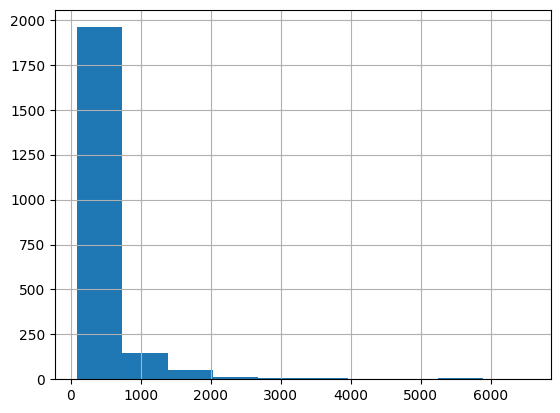

In [15]:
# Check the number of words distribution for all case progressions 
df[df['type'] == 'procesverloop']['data'].str.len().hist()

<AxesSubplot:>

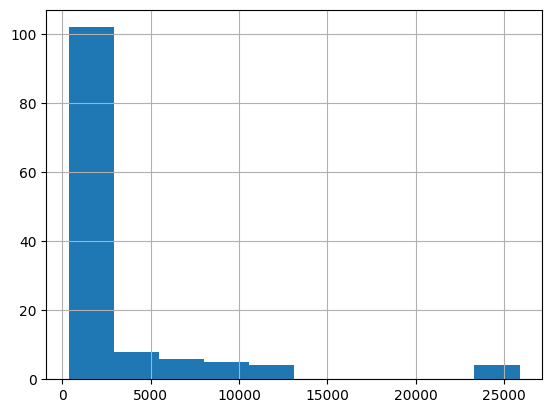

In [29]:
# Check the number of words distribution for all case introductions
df[df['type'] == 'inleiding']['data'].str.len().hist()

In [25]:
# The list of types of criminal cases
criminal_case_types = [
    'Verkeersovertredingen', 'Zedenmisdrijf', 'Fraude', 
    'Geweldsdelicten', 'Mishandeling', 'Kindermishandeling',
    'Moord en doodslag', 'Misdrijven tegen de openbare orde', 'Voorlopige hechtenis',
    'Klacht niet vervolgen strafbaar feit', 'Straftoemeting', 'Volwassenenstrafrecht',
    'Jeugdstrafrecht', 'Strafrechter kanton', 'Hoger beroep strafrecht',
    'Voorwaardelijke invrijheidstelling (tot 1 juli 2021)', 'Ontneming wederrechtelijk verkregen voordeel', 'Diefstal en inbraak',
    'Voorwaardelijke invrijheidstelling (per 1 juli 2021)'
]

# Dictionary to keep track of the count of each case type
case_counts = {case_type: 0 for case_type in criminal_case_types}

# Filter the dataframe for rows where 'type' is equal to 'eis'
eis_df = df[df['type'] == 'eis']

# Loop over each type of court case and count its occurrences in the 'data' column
for case_type in criminal_case_types:
    case_counts[case_type] = eis_df['data'].str.contains(case_type, case=False, na=False).sum()

for case_type, count in case_counts.items():
    print(f"{case_type}: {count}")

Verkeersovertredingen: 0
Zedenmisdrijf: 2
Fraude: 1
Geweldsdelicten: 0
Mishandeling: 52
Kindermishandeling: 0
Moord en doodslag: 0
Misdrijven tegen de openbare orde: 0
Voorlopige hechtenis: 26
Klacht niet vervolgen strafbaar feit: 0
Straftoemeting: 2
Volwassenenstrafrecht: 0
Jeugdstrafrecht: 5
Strafrechter kanton: 0
Hoger beroep strafrecht: 0
Voorwaardelijke invrijheidstelling (tot 1 juli 2021): 0
Ontneming wederrechtelijk verkregen voordeel: 0
Diefstal en inbraak: 0
Voorwaardelijke invrijheidstelling (per 1 juli 2021): 0


/var/folders/1j/594ysy1n0rj3y014tj89mlm40000gn/T/ipykernel_42176/1627432504.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  case_counts[case_type] = procesverloop_df['data'].str.contains(case_type, case=False, na=False).sum()


In [41]:
# Calculate word count for each 'inleiding'
df['word_count'] = df.apply(lambda x: len(x['data'].split()) if x['type'] == 'inleiding' else None, axis=1)

# Map ECLI to 'straf_hoogte' for 'beslissing' rows
straf_hoogte_map = df[df['type'] == 'beslissing'].set_index('ECLI')['straf_hoogte'].to_dict()

new_rows = []

# Iterate over each 'inleiding'
for index, row in df[df['type'] == 'inleiding'].iterrows():
    ecli = row['ECLI']
    if ecli in straf_hoogte_map:
        # Get 'hoofdstraf' for the current ECLI from 'beslissing' rows
        hoofdstraf = df.loc[(df['ECLI'] == ecli) & (df['type'] == 'beslissing'), 'hoofdstraf'].iloc[0]
        new_row = {
            'ECLI': ecli,
            'hoofdstraf': hoofdstraf,
            'word_count': row['word_count'],
            'straf_hoogte': straf_hoogte_map[ecli]
        }
        new_rows.append(new_row)

# Create a new DataFrame from the list of dictionaries
analysis_df = pd.DataFrame(new_rows)

# Calculation of correlation for each 'hoofdstraf'
results = {}
for hoofdstraf in analysis_df['hoofdstraf'].unique():
    subset = analysis_df[analysis_df['hoofdstraf'] == hoofdstraf]
    correlation = subset['word_count'].corr(subset['straf_hoogte'])
    results[hoofdstraf] = correlation

for key, value in results.items():
    print(f"Hoofdstraf: {key}, Correlation: {value}")

Hoofdstraf: geldboete, Correlation: 0.7378872201768895
Hoofdstraf: gevangenisstraf, Correlation: -0.167344230813827
Hoofdstraf: taakstraf, Correlation: 0.5148834368231953
Hoofdstraf: hechtenis, Correlation: -0.5861586408255264
Hoofdstraf: TBS, Correlation: nan
Hoofdstraf: vrijspraak, Correlation: 0.16879972116302586
Hoofdstraf: nan, Correlation: nan


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
